<a href="https://colab.research.google.com/github/MichaelV-07/03MAIR-Algoritmos-de-optimizacion/blob/main/Algoritmos_AG3_Michael_Vallejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Michael Vallejo <br>
Link:   https://colab.research.google.com/drive/13IpcL0ewjtJ5a6nzkpivwQV6-RPtgEoV?usp=sharing <br>
Github: https://github.com/MichaelV-07/03MAIR-Algoritmos-de-optimizacion
<br>




In [8]:
import math
import itertools
import numpy as np

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

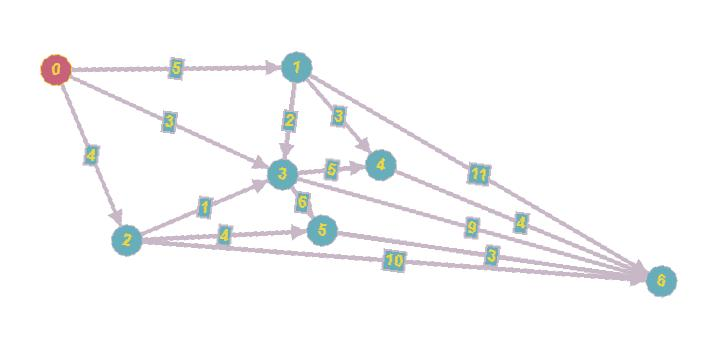

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
print(calcular_ruta(RUTA, 0,6))
print("Con valor" , PRECIOS[0][6])


La ruta es:
0,2,5
Con valor 11


##Problema de Asignacion de tarea

In [50]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [51]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [52]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [53]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [54]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [55]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [56]:
def fuerza_bruta(COSTES):
    # Representacion de la solucion será una tupla donde cada valor en la coordenada i-sima es la tarea asignado al agente i
    # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
    #
    # ¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponencial)
    # Con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES)))):
        valor_tmp = valor(s, COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s


    print("La mejor solucion es:", mejor_solucion, " con valor:", mejor_valor)
fuerza_bruta(COSTES)

La mejor solucion es: (0, 3, 1, 2)  con valor: 61


# Ramificación y Poda. Práctica

¿Que complejidad tiene el algoritmo por fuerza bruta?

debido a que el codigo genera $n!$ permutaciones y se evalua cada una en $ O(n) $ la complejidad del algoritmo por fuerza bruta es:
$$ O(n * n!)$$


### 5D

In [74]:

dimension = 5

# Generar matriz con valores aleatorios entre 10 y 50
COSTES_5D = np.random.randint(10, 51, (dimension, dimension))

COSTES_5D

array([[11, 25, 27, 26, 17],
       [10, 37, 30, 25, 44],
       [50, 14, 26, 32, 10],
       [48, 31, 32, 23, 50],
       [34, 15, 47, 42, 50]])

In [77]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES_5D):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES_5D[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES_5D)
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1


def CI(S,COSTES_5D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_5D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_5D)   ):
    VALOR += min( [ COSTES_5D[j][i] for j in range(len(S), len(COSTES_5D))  ])
  return VALOR

def CS(S,COSTES_5D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_5D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_5D)   ):
    VALOR += max( [ COSTES_5D[j][i] for j in range(len(S), len(COSTES_5D))  ])
  return VALOR

CI((0,1),COSTES_5D)

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES_5D):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES_5D)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES_5D)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES_5D)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES_5D)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES_5D)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES_5D)

La solucion final es: [{'s': (4, 0, 1, 3, 2), 'ci': 111}]  en  55  iteraciones  para dimension:  5


In [78]:
def fuerza_bruta(COSTES_5D):
    # Representacion de la solucion será una tupla donde cada valor en la coordenada i-sima es la tarea asignado al agente i
    # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
    #
    # ¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponencial)
    # Con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES_5D)))):
        valor_tmp = valor(s, COSTES_5D)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s


    print("La mejor solucion es:", mejor_solucion, " con valor:", mejor_valor)
fuerza_bruta(COSTES_5D)

La mejor solucion es: (1, 4, 0, 3, 2)  con valor: 85


### 6D

In [79]:
dimension = 6

# Generar matriz con valores aleatorios entre 10 y 50
COSTES_6D = np.random.randint(10, 51, (dimension, dimension))

COSTES_6D

array([[16, 25, 37, 20, 40, 19],
       [26, 37, 10, 27, 48, 21],
       [32, 46, 40, 43, 15, 21],
       [17, 20, 36, 19, 26, 45],
       [35, 37, 31, 43, 12, 21],
       [17, 48, 34, 38, 28, 46]])

In [80]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES_6D):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES_6D[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES_6D)
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1


def CI(S,COSTES_6D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_6D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_6D)   ):
    VALOR += min( [ COSTES_6D[j][i] for j in range(len(S), len(COSTES_6D))  ])
  return VALOR

def CS(S,COSTES_6D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_6D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_6D)   ):
    VALOR += max( [ COSTES_6D[j][i] for j in range(len(S), len(COSTES_6D))  ])
  return VALOR

CI((0,1),COSTES_6D)

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES_6D):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  DIMENSION = len(COSTES_6D)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES_6D)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES_6D)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES_6D)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES_6D)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES_6D)

La solucion final es: [{'s': (3, 2, 5, 1, 4, 0), 'ci': 100}]  en  173  iteraciones  para dimension:  6


In [81]:
def fuerza_bruta(COSTES_6D):
    # Representacion de la solucion será una tupla donde cada valor en la coordenada i-sima es la tarea asignado al agente i
    # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
    #
    # ¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponencial)
    # Con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES_6D)))):
        valor_tmp = valor(s, COSTES_6D)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s


    print("La mejor solucion es:", mejor_solucion, " con valor:", mejor_valor)
fuerza_bruta(COSTES_6D)

La mejor solucion es: (5, 3, 1, 0, 4, 2)  con valor: 100


### 7D

In [82]:
dimension = 7

# Generar matriz con valores aleatorios entre 10 y 50
COSTES_7D = np.random.randint(10, 51, (dimension, dimension))

COSTES_7D

array([[50, 41, 16, 14, 15, 25, 48],
       [16, 30, 33, 25, 38, 37, 34],
       [48, 20, 44, 31, 45, 30, 24],
       [28, 39, 23, 18, 47, 23, 27],
       [30, 48, 49, 13, 14, 12, 25],
       [12, 45, 48, 41, 21, 27, 43],
       [28, 10, 21, 21, 45, 41, 29]])

In [83]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES_7D):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES_7D[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES_7D)
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1


def CI(S,COSTES_7D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_7D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_7D)   ):
    VALOR += min( [ COSTES_7D[j][i] for j in range(len(S), len(COSTES_7D))  ])
  return VALOR

def CS(S,COSTES_7D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_7D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_7D)   ):
    VALOR += max( [ COSTES_7D[j][i] for j in range(len(S), len(COSTES_7D))  ])
  return VALOR

CI((0,1),COSTES_7D)

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES_7D):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  DIMENSION = len(COSTES_7D)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES_7D)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES_7D)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES_7D)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES_7D)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES_7D)

La solucion final es: [{'s': (2, 0, 1, 3, 5, 4, 6), 'ci': 132}]  en  379  iteraciones  para dimension:  7


In [84]:
def fuerza_bruta(COSTES_7D):
    # Representacion de la solucion será una tupla donde cada valor en la coordenada i-sima es la tarea asignado al agente i
    # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
    #
    # ¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponencial)
    # Con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES_7D)))):
        valor_tmp = valor(s, COSTES_7D)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s


    print("La mejor solucion es:", mejor_solucion, " con valor:", mejor_valor)
fuerza_bruta(COSTES_7D)

La mejor solucion es: (1, 6, 0, 3, 5, 4, 2)  con valor: 117


### 10D

In [85]:
dimension = 10

# Generar matriz con valores aleatorios entre 10 y 50
COSTES_10D = np.random.randint(10, 51, (dimension, dimension))

COSTES_10D

array([[10, 31, 18, 29, 14, 21, 28, 48, 22, 31],
       [26, 10, 22, 44, 15, 22, 36, 47, 12, 46],
       [42, 27, 24, 33, 15, 27, 13, 44, 32, 42],
       [31, 40, 41, 39, 45, 45, 38, 44, 23, 23],
       [17, 45, 41, 28, 35, 18, 33, 45, 26, 34],
       [17, 36, 28, 20, 11, 25, 18, 11, 30, 12],
       [23, 27, 35, 21, 45, 23, 16, 45, 42, 31],
       [24, 29, 21, 23, 34, 13, 22, 16, 14, 13],
       [32, 32, 14, 27, 31, 17, 20, 22, 23, 25],
       [50, 17, 35, 23, 22, 48, 36, 30, 38, 32]])

In [86]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES_10D):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES_10D[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES_10D)
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1


def CI(S,COSTES_10D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_10D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_10D)   ):
    VALOR += min( [ COSTES_10D[j][i] for j in range(len(S), len(COSTES_10D))  ])
  return VALOR

def CS(S,COSTES_10D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_10D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_10D)   ):
    VALOR += max( [ COSTES_10D[j][i] for j in range(len(S), len(COSTES_10D))  ])
  return VALOR

CI((0,1),COSTES_10D)

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES_10D):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  DIMENSION = len(COSTES_10D)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES_10D)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES_10D)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES_10D)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES_10D)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES_10D)

La solucion final es: [{'s': (0, 1, 4, 8, 5, 7, 6, 9, 2, 3), 'ci': 153}]  en  6155  iteraciones  para dimension:  10


In [87]:
def fuerza_bruta(COSTES_10D):
    # Representacion de la solucion será una tupla donde cada valor en la coordenada i-sima es la tarea asignado al agente i
    # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
    #
    # ¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponencial)
    # Con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES_10D)))):
        valor_tmp = valor(s, COSTES_10D)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s


    print("La mejor solucion es:", mejor_solucion, " con valor:", mejor_valor)
fuerza_bruta(COSTES_10D)

La mejor solucion es: (0, 1, 8, 9, 2, 4, 6, 5, 3, 7)  con valor: 153


###11D

In [9]:
dimension = 11

# Generar matriz con valores aleatorios entre 10 y 50
COSTES_11D = np.random.randint(10, 51, (dimension, dimension))

COSTES_11D

array([[43, 42, 32, 32, 34, 17, 14, 24, 23, 19, 36],
       [22, 10, 48, 37, 46, 46, 40, 10, 48, 48, 13],
       [23, 14, 16, 16, 38, 24, 10, 15, 14, 17, 23],
       [14, 48, 10, 29, 19, 41, 13, 49, 13, 22, 35],
       [48, 21, 46, 16, 29, 14, 41, 14, 27, 33, 13],
       [39, 38, 33, 28, 38, 18, 35, 40, 20, 11, 30],
       [39, 32, 19, 43, 34, 50, 26, 10, 49, 37, 24],
       [32, 39, 47, 30, 17, 48, 25, 38, 36, 17, 38],
       [44, 15, 23, 32, 23, 33, 36, 16, 15, 33, 31],
       [36, 40, 13, 31, 33, 25, 33, 37, 29, 27, 30],
       [44, 44, 35, 19, 33, 36, 31, 18, 20, 32, 45]])

In [10]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES_11D):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES_11D[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES_11D)
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1


def CI(S,COSTES_11D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_11D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_11D)   ):
    VALOR += min( [ COSTES_11D[j][i] for j in range(len(S), len(COSTES_11D))  ])
  return VALOR

def CS(S,COSTES_11D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_11D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_11D)   ):
    VALOR += max( [ COSTES_11D[j][i] for j in range(len(S), len(COSTES_11D))  ])
  return VALOR

CI((0,1),COSTES_11D)

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES_11D):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  DIMENSION = len(COSTES_11D)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES_11D)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES_11D)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES_11D)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES_11D)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES_11D)

La solucion final es: [{'s': (5, 1, 6, 0, 10, 9, 7, 4, 8, 2, 3), 'ci': 149}]  en  11595  iteraciones  para dimension:  11


In [11]:
def fuerza_bruta(COSTES_11D):
    # Representacion de la solucion será una tupla donde cada valor en la coordenada i-sima es la tarea asignado al agente i
    # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
    #
    # ¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponencial)
    # Con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES_11D)))):
        valor_tmp = valor(s, COSTES_11D)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s


    print("La mejor solucion es:", mejor_solucion, " con valor:", mejor_valor)
fuerza_bruta(COSTES_11D)

La mejor solucion es: (3, 1, 9, 10, 7, 0, 2, 6, 8, 5, 4)  con valor: 149


### 12D

In [94]:
dimension = 12

# Generar matriz con valores aleatorios entre 10 y 50
COSTES_12D = np.random.randint(10, 51, (dimension, dimension))

COSTES_12D

array([[47, 21, 29, 42, 40, 25, 26, 12, 17, 37, 19, 17],
       [40, 36, 34, 28, 41, 12, 49, 39, 20, 20, 21, 11],
       [36, 18, 16, 36, 29, 17, 33, 50, 16, 26, 18, 19],
       [18, 22, 43, 13, 35, 43, 37, 11, 44, 27, 37, 34],
       [42, 41, 25, 41, 30, 31, 40, 28, 45, 15, 21, 19],
       [45, 28, 44, 24, 18, 41, 46, 21, 20, 33, 30, 35],
       [39, 12, 13, 10, 46, 15, 32, 42, 29, 46, 25, 25],
       [19, 45, 28, 11, 16, 41, 11, 24, 16, 16, 21, 32],
       [27, 37, 49, 44, 49, 30, 32, 23, 33, 45, 47, 46],
       [27, 21, 20, 29, 35, 17, 38, 33, 14, 30, 38, 13],
       [39, 12, 25, 45, 50, 32, 18, 42, 20, 21, 28, 47],
       [19, 34, 48, 35, 48, 46, 22, 30, 50, 47, 28, 21]])

In [95]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES_12D):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES_12D[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES_12D)
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1


def CI(S,COSTES_12D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_12D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_12D)   ):
    VALOR += min( [ COSTES_12D[j][i] for j in range(len(S), len(COSTES_12D))  ])
  return VALOR

def CS(S,COSTES_12D):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES_12D[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES_12D)   ):
    VALOR += max( [ COSTES_12D[j][i] for j in range(len(S), len(COSTES_12D))  ])
  return VALOR

CI((0,1),COSTES_12D)

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES_12D):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  DIMENSION = len(COSTES_12D)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES_12D)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES_12D)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES_12D)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES_12D)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES_12D)

La solucion final es: [{'s': (7, 11, 8, 3, 9, 4, 2, 6, 0, 5, 1, 10), 'ci': 193}]  en  22899  iteraciones  para dimension:  12


In [ ]:
def fuerza_bruta(COSTES_12D):
    # Representacion de la solucion será una tupla donde cada valor en la coordenada i-sima es la tarea asignado al agente i
    # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
    #
    # ¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponencial)
    # Con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES_12D)))):
        valor_tmp = valor(s, COSTES_12D)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s


    print("La mejor solucion es:", mejor_solucion, " con valor:", mejor_valor)
fuerza_bruta(COSTES_12D)

### ¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?

Al realizar la ejecución de los algoritmos por Fuerza Bruta y Ramificación y Poda en diferentes dimensiones se obtuvieron los siguientes tiempos de ejecución:

| Dimensión   | Fuerza Bruta | Ramificación y Poda  |
|:-------------:|:------:|:----------:|
| 7       | 0s   | 0s |
| 10      | 16s   | 3s |
| 11       | 2m52s   | 12s     |
| 12       | Tu sesión ha fallado porque se ha usado toda la memoria RAM disponible.  | 1m43s |

Con base en los tiempos de ejecución de se determina que a partir de la dimensión 11 el tiempo de ejecución deja de ser una opción, puesto que, el tiempo de ejecución aumenta significativamente.


### ¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida?

Con base con los resultados en tiempos de ejecución se puede llegar a la conclusión que a partir de la dimensión 12 deja de ser una opción valida por el tiempo de ejecución.

##Descenso del gradiente

In [32]:
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [33]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

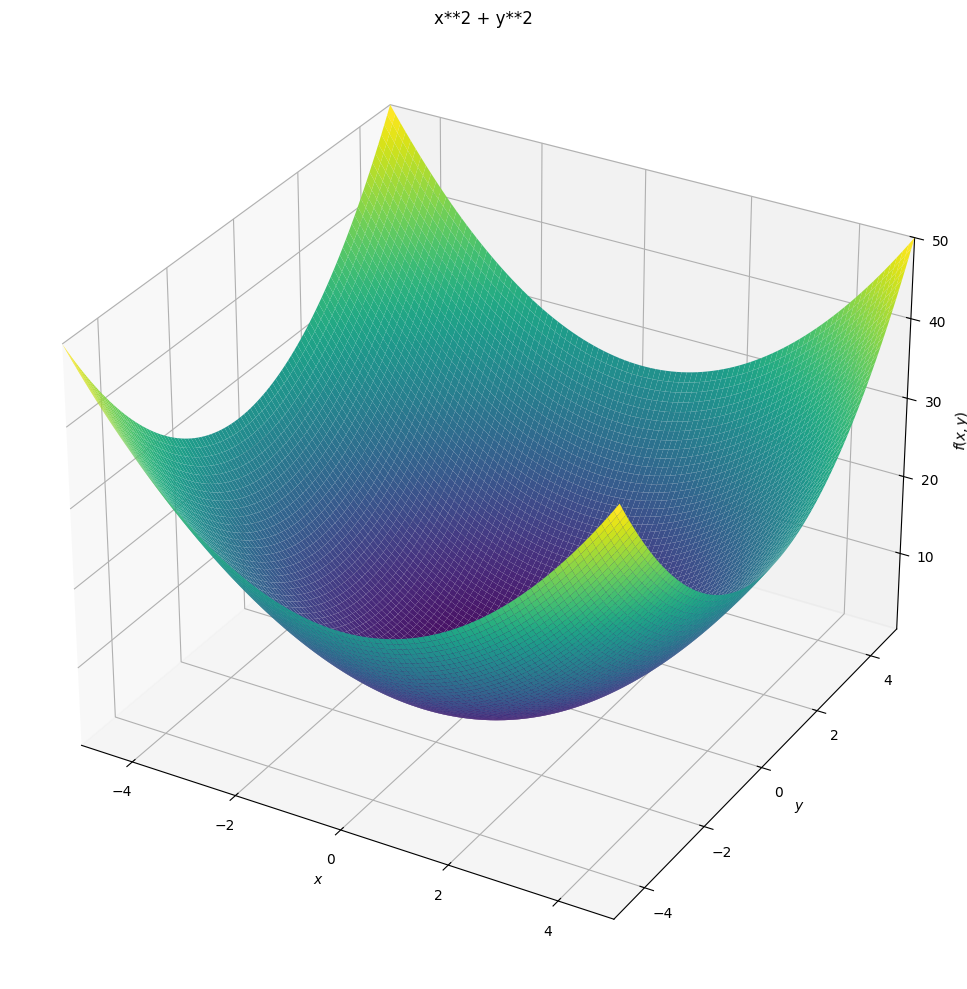

In [34]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

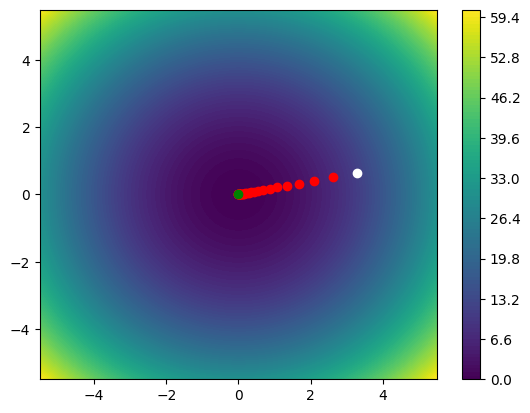

Solucion: [4.690310977925083e-05, 9.064456716102529e-06] 2.282066082522551e-09


In [35]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
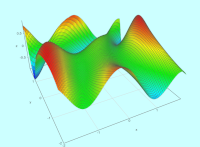


In [36]:
# Definimos la función basada en la imagen
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.exp(X[1]))

# Definimos el gradiente de la función
df = lambda X: [
    np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * (X[0]) * np.cos(2 * X[0] + 1 - np.exp(X[1])) -
    2 * np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.sin(2 * X[0] + 1 - np.exp(X[1])),

    -1/2 * X[1] * np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.exp(X[1])) +
    np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.sin(2 * X[0] + 1 - np.exp(X[1])) * np.exp(X[1])
]

# Evaluamos la función y su gradiente en el punto [1,2]
print("f([1,2]) =", f([1,2]))
print("df([1,2]) =", df([1,2]))

f([1,2]) = -0.1901516547006032
df([1,2]) = [-0.8803745550791662, 3.9384502467765357]


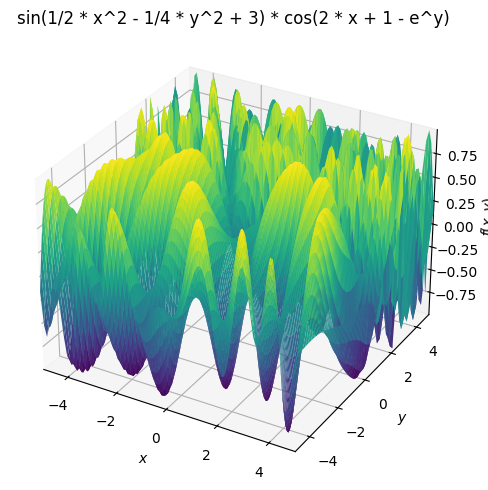

In [37]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d

# Definimos las variables simbólicas
x, y = symbols('x y')

# Definimos la función según la imagen
f = sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2 * x + 1 - exp(y))

# Graficamos la función en un rango específico
plot3d(f, (x, -5, 5), (y, -5, 5),
       title='sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2 * x + 1 - e^y)',
       size=(5, 5))

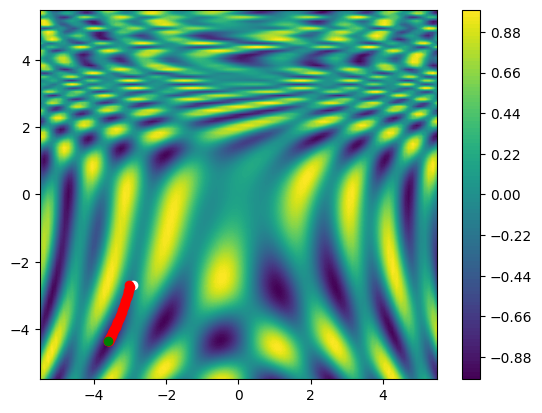

Solución: [-3.6080470225966694, -4.369551717998241] f(P) = -0.9982462221665684


In [40]:
import matplotlib.pyplot as plt

# Definimos la función basada en la imagen
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.exp(X[1]))

# Definimos el gradiente de la función
df = lambda X: [
    np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * (X[0]) * np.cos(2 * X[0] + 1 - np.exp(X[1])) -
    2 * np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.sin(2 * X[0] + 1 - np.exp(X[1])),

    -1/2 * X[1] * np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.exp(X[1])) +
    np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.sin(2 * X[0] + 1 - np.exp(X[1])) * np.exp(X[1])
]

# Prepara los datos para dibujar el mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion, cmap='viridis')
plt.colorbar()

# Generamos un punto aleatorio inicial y lo pintamos de blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje fija
TA = 0.1

# Iteraciones del gradiente descendente
for _ in range(50):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()

print("Solución:", P, "f(P) =", f(P))